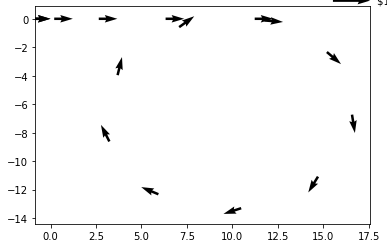

In [5]:
from matplotlib import pyplot as plt
from math import pi, sin, cos
import numpy as np
from helpers import process_data

data_list = process_data("trajectory_example.pickle")

def get_speeds(data_list):
    last_time = 0.0
    last_disp = 0.0
    speeds    = [0.0]
    for entry in data_list[1:]:
        # unpack the entry
        ts, disp, yaw, acc = entry
        
        # calculate avg speed for this time interval
        dx = disp - last_disp
        dt = ts - last_time
        if dt < 0.0001:
            print("error! dt is too small")
            speeds.append(0.0)
            continue
        v  = dx / dt
        
        # add to history of speeds
        speeds.append(v)
        
        # update last_time and last_disp to new vals
        last_time = ts
        last_disp = disp
    return speeds

def get_headings(data_list):
    last_time  = 0.0
    theta      = 0.0
    thetas     = [0.0]
    for entry in data_list[1:]:
        ts, disp, yaw, acc = entry
        dt = ts - last_time
        d_theta = dt * yaw 
        theta += d_theta
        theta %= (2 * pi)
        thetas.append(theta)
        last_time = ts
    return thetas
    
def get_x_y(data_list):
    speeds = get_speeds(data_list)
    thetas = get_headings(data_list)
    x = 0.0
    y = 0.0
    last_time = 0.0
    XY = [(x, y)]    
    for i in range(1,len(data_list)):
        speed = speeds[i]
        theta = thetas[i]
        entry = data_list[i]
        ts, disp, yaw, acc = entry
        dt = ts - last_time
        D  = speed * dt
        dx = D * cos(theta)
        dy = D * sin(theta)
        x += dx
        y += dy
        XY.append((x,y))
        last_time = ts
    return XY

def show_x_y(data_list, increment=1):
    XY = get_x_y(data_list)
    headings = get_headings(data_list)
    X  = [d[0] for d in XY]
    Y  = [d[1] for d in XY]
    h_x = np.cos(headings)
    h_y = np.sin(headings)
    Q = plt.quiver(X[::increment],
                   Y[::increment],
                   h_x[::increment],
                   h_y[::increment],
                   units='x',
                   pivot='tip')
    qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$1 \frac{m}{s}',
                       labelpos='E', coordinates='figure')
    plt.show()
show_x_y(data_list, increment=1)